In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sce = 'Scenario 3'
if sce == 'Scenario 1':
    print('S1')
    x_pow, y_pow = 0.5, 2
elif sce == 'Scenario 2':
    print('S2')
    x_pow, y_pow = 4, 2
elif sce == 'Scenario 3':
    print('S3')
    x_pow, y_pow = 0.5, 0.5
elif sce == 'Scenario 4':
    print('S4')
    x_pow, y_pow = 2, 0.5
else:
    print('Not Supported Scenrio')

S3


In [12]:
sce = 'Scenario 1'

In [4]:
def generate_data_with_custom_outputs(n_points, n_outputs, on_frontier_percentage, r, x_pow, y_pow, plotting=False):
    """
    Generate data points for a customizable number of outputs.

    :param n_points: Total number of points to generate.
    :param n_outputs: Number of output dimensions.
    :param on_frontier_percentage: Percentage of points that are on the production frontier.
    :param r: The radius or scale factor for the production possibility space.
    :return: A numpy array of generated points.
    """
    n_points_frontier = int(np.ceil(n_points * on_frontier_percentage))
    n_points_inside = n_points - n_points_frontier

    # Generate points inside the production possibility space
    points_inside = []
    for p in range(n_points_inside):
        while True:
            point = np.random.uniform(0, r, n_outputs)
            sum_of_powers = point[0]**y_pow + point[1]**y_pow + point[2]**0.5
            if sum_of_powers <= r**x_pow:
                points_inside.append(point)
                break

    # Generate points on the production frontier
    points_frontier = []
    for _ in range(n_points_frontier):
        # Distribute r^2 among the outputs
        remaining = r**x_pow
        point = np.zeros(n_outputs)
        for i in range(n_outputs - 1):
            point[i] = np.random.uniform(0, remaining)
            remaining -= point[i]
        point[-1] = remaining  # Assign the remaining value to the last output
        
        tmp_point = point**(1 / y_pow)
        tmp_point[-1] = remaining**(1 / 0.5)
        np.random.shuffle(tmp_point)  # Shuffle to ensure random distribution among outputs
        points_frontier.append(tmp_point)  # Take the square root to meet the frontier condition


    # Combine the points into a single array
    all_points = np.vstack((points_inside, points_frontier))
    
    if plotting and n_outputs==3:
        # Create a new 3D figure
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')

        # Plot the points inside the shape
        ax.scatter(all_points[:, 0], all_points[:, 1], all_points[:, 2], color='gray')

    #     # Plot the points on the frontier
    #     ax.scatter(points_frontier[:, 0], points_frontier[:, 1], points_frontier[:, 2], color='green')

        # Set labels
        ax.set_xlabel('Y1')
        ax.set_ylabel('Y2')
        ax.set_zlabel('Y3')

        # Show the plot
        plt.show()

    return all_points


# print(data)


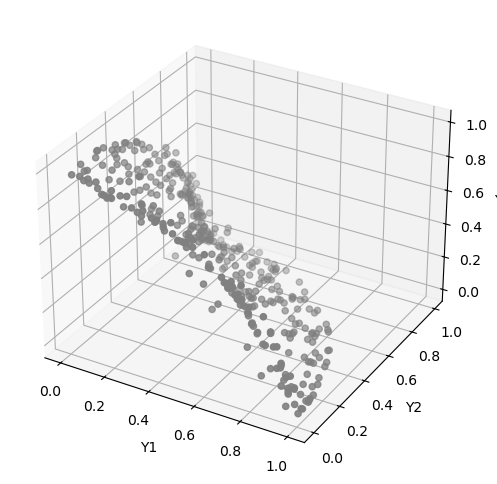

In [17]:
# Example usage:
n_points = 400
n_outputs = 3  # For example, 4 outputs
on_frontier_percentage = 0.99
r = 1

data = generate_data_with_custom_outputs(n_points, n_outputs, on_frontier_percentage, r, x_pow=x_pow, y_pow=2, plotting=True)

NameError: name 'df_data' is not defined

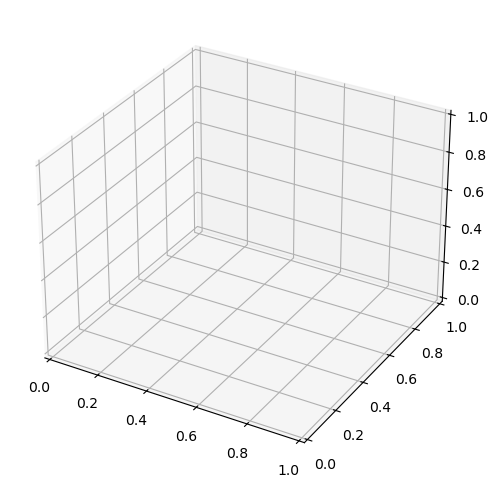

In [18]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points inside the shape
ax.scatter(df_data['y1'], df_data['y2'], df_data['y3'], color='gray')

#     # Plot the points on the frontier
#     ax.scatter(points_frontier[:, 0], points_frontier[:, 1], points_frontier[:, 2], color='green')

# Set labels
ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')

# Show the plot
plt.show()

In [66]:
def gen_output_with_var_cost(n_points=10):
    # Define the radii
    all_output = []
    radius = np.linspace(0.01, 3, 3)
    print(radius, x_pow, y_pow)
    for r in radius:
        print('r=',r)
        level_output = generate_data_with_custom_outputs(n_points=n_points, n_outputs=3, on_frontier_percentage=0.333, 
                                                         r=r, x_pow=x_pow, y_pow=2, plotting=True)
        all_output.append(level_output)
    return all_output

[0.01  1.505 3.   ] 0.5 0.5
r= 0.01


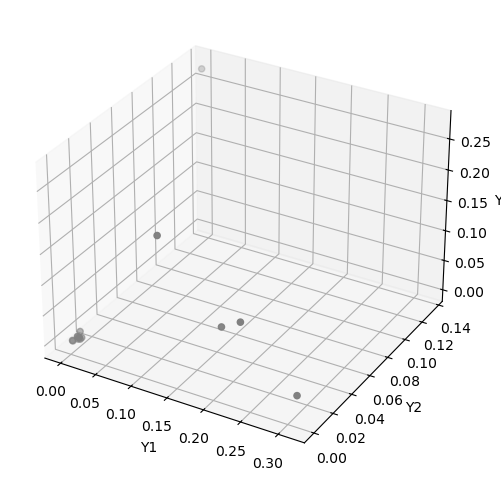

r= 1.5050000000000001


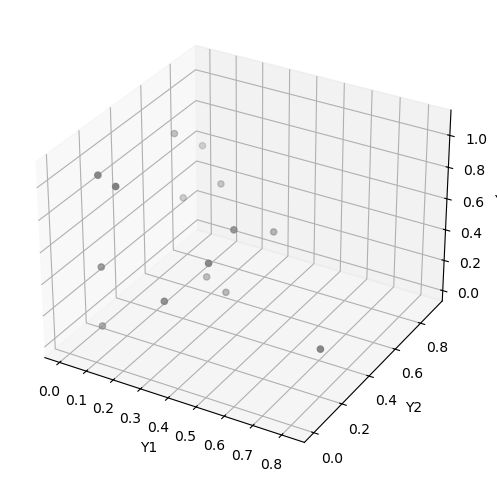

r= 3.0


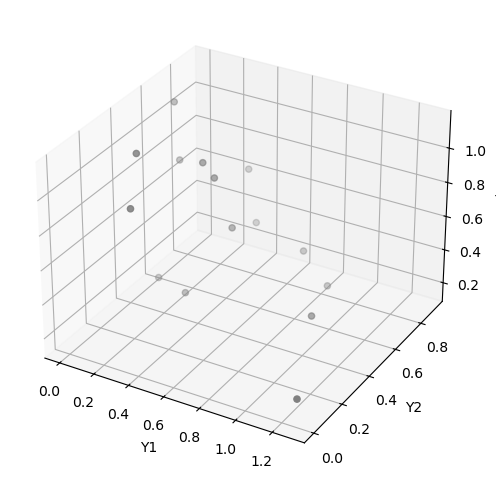

0.8057064598273407
0.8057064598273407
0.8057064598273407
0.8057064598273407
0.8057064598273407
0.8057064598273407
0.8057064598273407
0.8057064598273407
0.8057064598273407
0.8057064598273407
0.8057064598273407
0.8057064598273407
0.8057064598273407
0.8057064598273407
0.8057064598273407
4.33528508402631
4.33528508402631
4.33528508402631
4.33528508402631
4.33528508402631
4.33528508402631
4.33528508402631
4.33528508402631
4.33528508402631
4.33528508402631
4.33528508402631
4.33528508402631
4.33528508402631
4.33528508402631
4.33528508402631
5.250625306048787
5.250625306048787
5.250625306048787
5.250625306048787
5.250625306048787
5.250625306048787
5.250625306048787
5.250625306048787
5.250625306048787
5.250625306048787
5.250625306048787
5.250625306048787
5.250625306048787
5.250625306048787
5.250625306048787


In [67]:
all_output = gen_output_with_var_cost(n_points=15)
all_output_with_input = []
eff_mode = 'max'
for output in all_output:
    level_output_with_input = []
    for y1, y2, y3 in output:
        if eff_mode == 'max':
            eff = np.max([ (y2**y_pow + y1**y_pow + y3**y_pow)**(1/x_pow) for y1, y2, y3 in output])
        else:
            eff = 0
        print(eff)
        output_with_input = [y1, y2, y3, eff]
        level_output_with_input.append(output_with_input)
    all_output_with_input.append(level_output_with_input)

In [68]:
df = pd.DataFrame(np.array(all_output_with_input).reshape(len(all_output_with_input)*len(all_output_with_input[0]),4), columns=['y1','y2','y3','x'])
df.index = ['DMU ' + str(i) for i in df.index]
df

,y1,y2,y3,x
DMU 0,0.006573,0.006298,0.001290,0.805706
DMU 1,0.006915,0.003837,0.005450,0.805706
DMU 2,0.009301,0.001182,0.007598,0.805706
DMU 3,0.003257,0.004666,0.004139,0.805706
DMU 4,0.000826,0.008661,0.005971,0.805706
DMU 5,0.009952,0.002715,0.005403,0.805706
DMU 6,0.001948,0.000977,0.002047,0.805706
DMU 7,0.000771,0.001386,0.001820,0.805706
DMU 8,0.002221,0.005152,0.003404,0.805706
DMU 9,0.002953,0.006218,0.000203,0.805706


In [69]:
df['real_x'] = (df['y2']**y_pow + df['y1']**y_pow + df['y3']**y_pow)**(1/x_pow)

In [6]:
df = pd.read_csv('marginal_effect_analysis_mixed.csv')

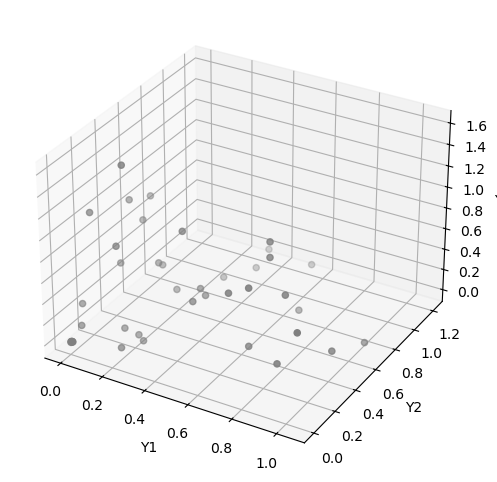

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points inside the shape
ax.scatter(df['y1'], df['y2'], df['y3'], color='gray')

#     # Plot the points on the frontier
#     ax.scatter(points_frontier[:, 0], points_frontier[:, 1], points_frontier[:, 2], color='green')

# Set labels
ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
ax.set_zlabel('Y3')

# Show the plot
plt.show()

In [8]:
#%%
import dmp
import pandas as pd
import numpy as np
import constant as const
import solver
from load_data import denoise_nonpositive, LIFE141516, LIFE_DUMMY141516, LIFE181920
import time
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
#%%

In [9]:
transformed_df = df.copy()
transformed_df['class'] = transformed_df.groupby('x').ngroup()
# transformed_df = transformed_df[transformed_df['class']==1]
eff_dict, lambdas_dict, projected_x, projected_y =\
solver.dea_dual(dmu=transformed_df.index, 
                x=np.array(transformed_df[['x']].T), 
                y=np.array(transformed_df[['y1', 'y2', 'y3']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')

# HVI

In [10]:
from pymoo.indicators.hv import HV
from pymoo.problems import get_problem
import numpy as np
# Nested Approach
data = {
    'y1': projected_y[0],
    'y2': projected_y[1],
    'y3': projected_y[2],
    'class': transformed_df['class']
}

df_projected = pd.DataFrame(data)
df_test = df[['y1', 'y2']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y1']].T)+10, 
                y=np.array(tmp_df[['y2']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    




RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)


In [11]:
#calculate hvi
df_plot = df_test[df_test['frontier']==1]
hv_points = df_plot[['y1','y2']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))


HV 0.4533475477888539
0.42239859941931635


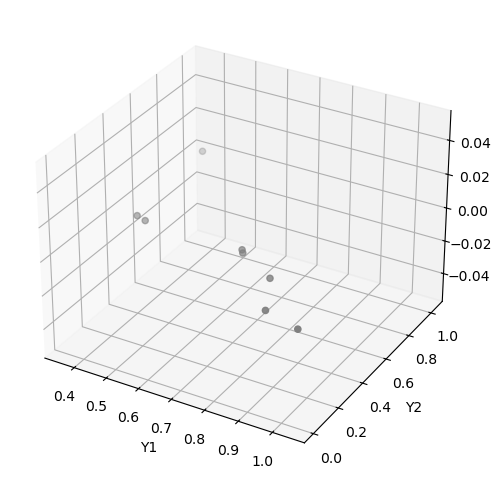

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points inside the shape
ax.scatter(df_plot['y1'], df_plot['y2'], color='gray')

#     # Plot the points on the frontier
#     ax.scatter(points_frontier[:, 0], points_frontier[:, 1], points_frontier[:, 2], color='green')

# Set labels
ax.set_xlabel('Y1')
ax.set_ylabel('Y2')
# ax.set_zlabel('Y3')

# Show the plot
plt.show()

# Y1-Y2 then Y3

In [13]:
df_test = df[['y1', 'y2']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y1']].T)+10, 
                y=np.array(tmp_df[['y2']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1

#calculate hvi
df_plot = df_test[df_test['frontier']==1]
hv_points = df_plot[['y1','y2']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
HV 0.4533475477888539
0.42239859941931

# Y2-Y3 then Y1

In [14]:
df_test = df[['y2', 'y3']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y2']].T)+10, 
                y=np.array(tmp_df[['y3']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1

#calculate hvi
df_plot = df_test[df_test['frontier']==1]
hv_points = df_plot[['y2','y3']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
HV 0.5795115852381445
0.47743549794942736


# Y1-Y3 then Y2

In [15]:
df_test = df[['y1', 'y3']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y1']].T)+10, 
                y=np.array(tmp_df[['y3']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1

#calculate hvi
df_plot = df_test[df_test['frontier']==0]
hv_points = df_plot[['y1','y3']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
HV 0.22564523833570677
0.13480649499341088


# Y1-Y2-Y3 HVI

In [16]:
df_test = df[['y1', 'y2', 'y3', 'x', 'real_x']]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index


fix_index = df_test.index

while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[['y1']].T)+10, 
                y=np.array(tmp_df[['y2', 'y3']].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1

#calculate hvi
df_plot = df_test[df_test['frontier']==0]
hv_points = df_plot[['y1','y2', 'y3']].to_numpy()
# The result found by an algorithm
A = hv_points

ref_point = np.amax(A, axis=0)

ind = HV(ref_point=ref_point)
ind = HV(ref_point=ref_point)
print("HV", ind(A))
print(ind(A)/ np.prod(ref_point))

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
HV 1.3143219427416653
0.6469805034568343


In [17]:
df_test

,y1,y2,y3,x,real_x,frontier,index
0,0.000158,0.006831,0.002679,0.284771,0.002684,4,0
1,0.000036,0.004553,0.003096,0.284771,0.003098,4,1
2,0.003781,0.003498,0.008708,0.284771,0.008713,3,2
3,0.004116,0.004970,0.002718,0.284771,0.002722,4,3
4,0.006105,0.006118,0.006664,0.284771,0.006676,3,4
5,0.001954,0.001375,0.001046,0.284771,0.001046,5,5
6,0.005419,0.007969,0.003917,0.284771,0.003929,3,6
7,0.003917,0.003456,0.006016,0.284771,0.006020,4,7
8,0.001894,0.009574,0.001176,0.284771,0.001183,3,8
9,0.006647,0.009040,0.000730,0.284771,0.000737,3,9


In [18]:
input_levels = df_test['x'].unique()
frontier_levels = np.sort(df_test['frontier'].unique())
frontier_levels

array([0, 1, 2, 3, 4, 5])

In [19]:
import statsmodels.formula.api as sm
# for x_level in input_levels:
for front in frontier_levels:
    # Filter data for the current input level and efficient observations
    # subset = df_plot[df_plot['x'] == x_level]
    subset = df_test[df_test['frontier'] == front]
    
    # print(subset)
    subset['minus_x'] = -subset['real_x']
    # Define the regression formula for three outputs
    formula = "minus_x ~  y1 + y2 + y3 + y1*y2 + y1*y3 + y2*y3"

    # Fit the OLS regression model
    model = sm.ols(formula, data=subset).fit()

    # Extract bij parameters and their p-values
    b12 = model.params["y1:y2"]
    p_value_b12 = model.pvalues["y1:y2"]

    b13 = model.params["y1:y3"]
    p_value_b13 = model.pvalues["y1:y3"]

    b23 = model.params["y2:y3"]
    p_value_b23 = model.pvalues["y2:y3"]

    # Print or store the results
    print(f"Frontier Level: {front}")
    print('Number of DMUs: ', subset.shape[0])
    print(f"Outputs y1 & y2: b12 = {b12:.4f}, p-value = {p_value_b12:.4f}")
    print(f"Outputs y1 & y3: b13 = {b13:.4f}, p-value = {p_value_b13:.4f}")
    print(f"Outputs y2 & y3: b23 = {b23:.4f}, p-value = {p_value_b23:.4f}")

Frontier Level: 0
Number of DMUs:  23
Outputs y1 & y2: b12 = 3.6850, p-value = 0.0028
Outputs y1 & y3: b13 = 1.2739, p-value = 0.0730
Outputs y2 & y3: b23 = 0.4137, p-value = 0.5680
Frontier Level: 1
Number of DMUs:  5
Outputs y1 & y2: b12 = 8.0933, p-value = nan
Outputs y1 & y3: b13 = 1.7228, p-value = nan
Outputs y2 & y3: b23 = -0.3052, p-value = nan
Frontier Level: 2
Number of DMUs:  5
Outputs y1 & y2: b12 = -0.1697, p-value = nan
Outputs y1 & y3: b13 = 0.1616, p-value = nan
Outputs y2 & y3: b23 = -0.9937, p-value = nan
Frontier Level: 3
Number of DMUs:  7
Outputs y1 & y2: b12 = -0.3363, p-value = nan
Outputs y1 & y3: b13 = -0.3208, p-value = nan
Outputs y2 & y3: b23 = -0.4904, p-value = nan
Frontier Level: 4
Number of DMUs:  4
Outputs y1 & y2: b12 = 0.0019, p-value = nan
Outputs y1 & y3: b13 = -0.0043, p-value = nan
Outputs y2 & y3: b23 = -0.0033, p-value = nan
Frontier Level: 5
Number of DMUs:  1
Outputs y1 & y2: b12 = -0.0000, p-value = nan
Outputs y1 & y3: b13 = -0.0000, p-value

# MRTS

In [20]:
fix_index = df_test.index
while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[[axis_1_name]].T)+10, 
                y=np.array(tmp_df[[axis_2_name]].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    break

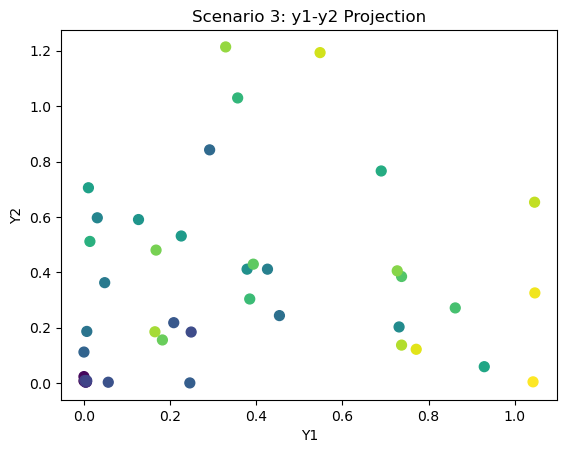

In [21]:
axis_1, axis_2 = projected_y[0], projected_y[1]
axis_1_name, axis_2_name = 'y1', 'y2'
sub_tdf = transformed_df[['y1', 'y2', 'x', 'class']]
# 建立一個新的圖表
plt.figure()
# 計算點的個數
num_points = len(axis_1)

# 生成由淺到深的顏色列表
colors = np.arange(num_points) / (num_points - 1)
# 繪製座標點
plt.scatter(axis_1, axis_2, marker='o', s=50, c=colors)  # s 是點的大小
# 設定顏色條
# plt.colorbar(label='Index')
# 設定圖表標題與軸標籤
# plt.title('座標圖')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.title(f'{sce}: {axis_1_name}-{axis_2_name} Projection')

# 加入圖例
# plt.legend()`

# 顯示圖表
plt.show()

In [22]:
data = {
    'y1': sub_tdf[axis_1_name],
    'y2': sub_tdf[axis_2_name],
    'class': sub_tdf['class']
}

df = pd.DataFrame(data)

In [23]:
# Group by class, sort by y1, and calculate index
def calc_index(group):
    group = group.sort_values(by=axis_1_name)
    group['index_value'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(0)
    return group
df_test = df[[axis_1_name, axis_2_name]]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index
df_test

,y1,y2,frontier,index
0,0.000158,0.006831,-1,0
1,0.000036,0.004553,-1,1
2,0.003781,0.003498,-1,2
3,0.004116,0.004970,-1,3
4,0.006105,0.006118,-1,4
5,0.001954,0.001375,-1,5
6,0.005419,0.007969,-1,6
7,0.003917,0.003456,-1,7
8,0.001894,0.009574,-1,8
9,0.006647,0.009040,-1,9


In [24]:
fix_index = df_test.index
while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[[axis_1_name]].T)+10, 
                y=np.array(tmp_df[[axis_2_name]].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)


Frontier 0
5 DMUs


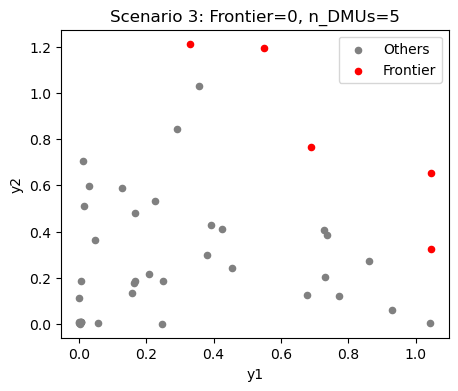

Frontier 1
8 DMUs


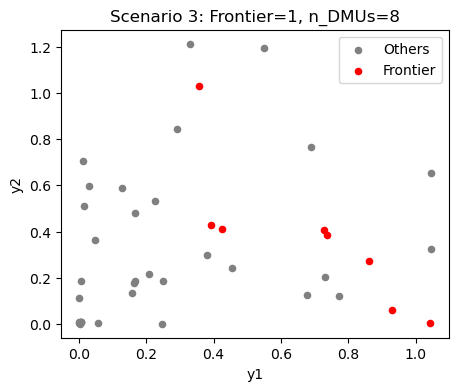

Frontier 2
5 DMUs


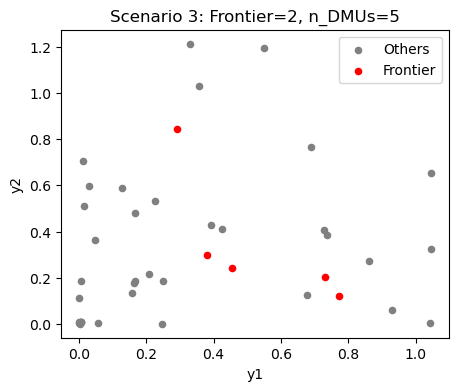

Frontier 3
6 DMUs


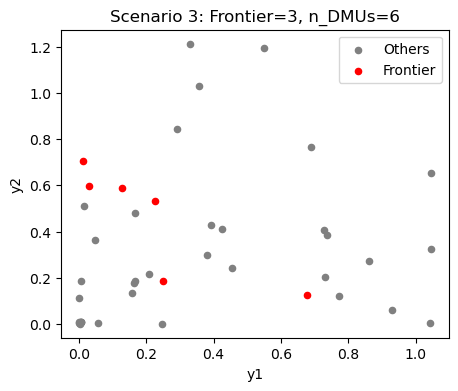

Frontier 4
4 DMUs


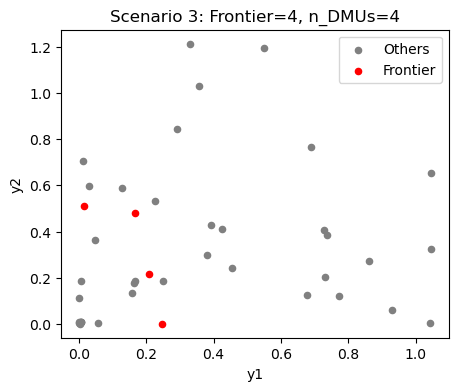

Frontier 5
2 DMUs


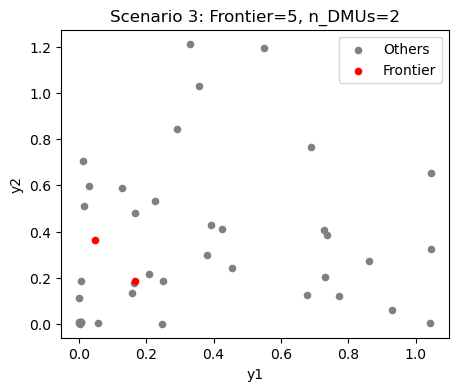

Frontier 6
2 DMUs


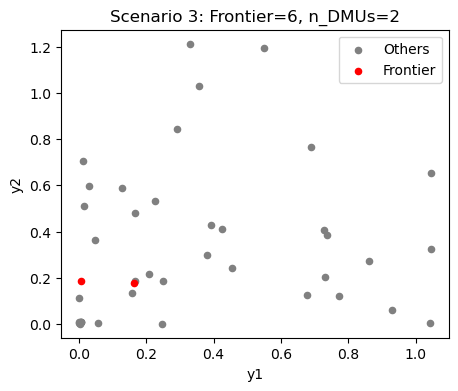

Frontier 7
1 DMUs


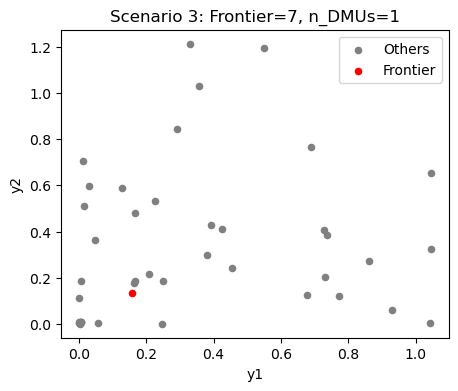

Frontier 8
4 DMUs


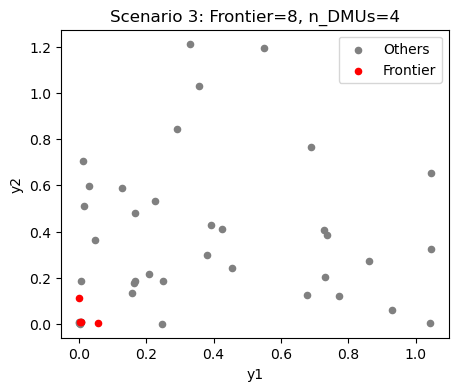

Frontier 9
2 DMUs


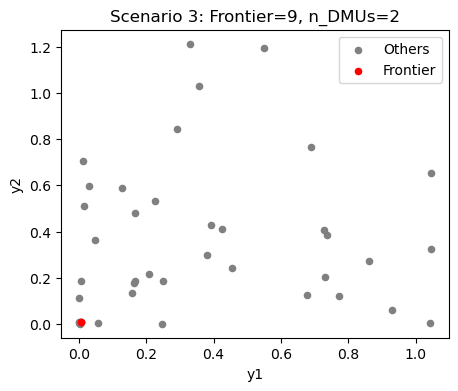

Frontier 10
2 DMUs


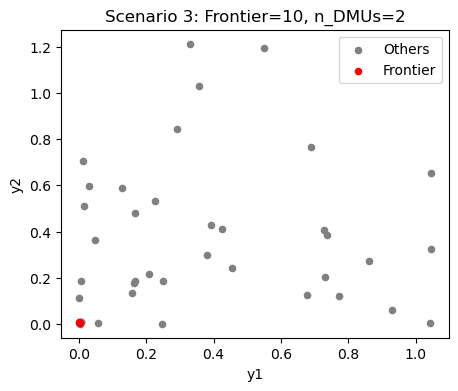

Frontier 11
3 DMUs


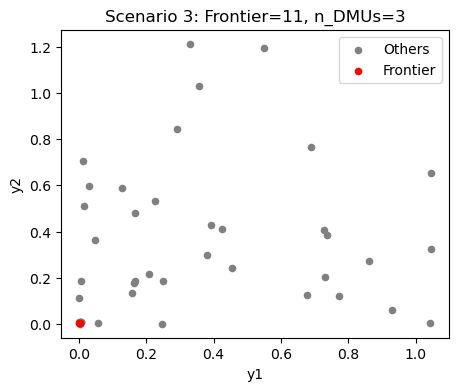

Frontier 12
1 DMUs


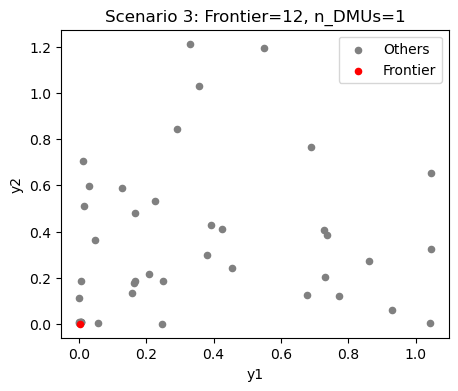

In [25]:
for i in range(len(df_test['frontier'].unique())):
    print('Frontier', i)
    tmp_0 = df_test[df_test['frontier']==i]
    tmp_1 = df_test[df_test['frontier']!=i]
    print(f'{tmp_0.shape[0]} DMUs')

    # Create the scatter plot
    plt.figure(figsize=(5, 4))
    plt.scatter(tmp_1[axis_1_name], tmp_1[axis_2_name], c='gray', label=f'Others', s=20)
    plt.scatter(tmp_0[axis_1_name], tmp_0[axis_2_name], c='red', label=f'Frontier', s=20)
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.title(f'{sce}: Frontier={i}, n_DMUs={tmp_0.shape[0]}')
    plt.legend()
    plt.show()
    

In [26]:
# Group by class, sort by y1, and calculate index
def cal_MRTS(group):
    group = group.sort_values(by=axis_1_name)
    group['MRTS'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(np.nan)
    return group

MRTS = df_test.groupby('frontier').apply(cal_MRTS)

result = MRTS[[axis_1_name, axis_2_name, 'MRTS']]
result.columns=[axis_1_name, axis_2_name, 'MRTS']
result.reset_index(inplace=True)

diff_list = result[result['frontier']==0]['MRTS'].diff()
import statistics
diff_ary = np.array(diff_list)
diff_ary = diff_ary[~np.isnan(diff_ary)]
# Calculate the mean of the list
mean = statistics.mean(diff_ary)

# Calculate the mean after removing the maximum and minimum values
mean_without_extremes = statistics.mean(sorted(diff_ary)[1:-1])

# Calculate the median of the list
median = statistics.median(diff_ary)

# Print the results
print("Mean:", mean)
print("Mean after removing extremes:", mean_without_extremes)
print("Median:", median)
if mean_without_extremes > 0:
    print('Negative Return to Scope')
elif mean_without_extremes == 0:
    print('Constant Return to Scope')
else:
    print('Positive Return to Scope')

Mean: -170.72956890110672
Mean after removing extremes: -2.91727577265109
Median: -2.91727577265109
Positive Return to Scope


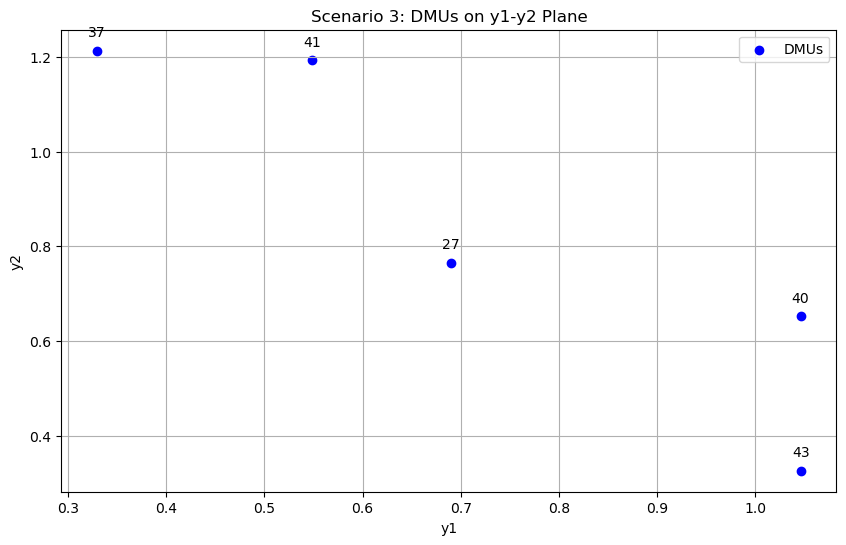

In [27]:
df_est = df_test[df_test['frontier']==0]
df_est
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'y1' column
df_sorted = df_est.sort_values(by=axis_1_name)

# Plot the DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMUs')
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title(f'{sce}: DMUs on {axis_1_name}-{axis_2_name} Plane')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()

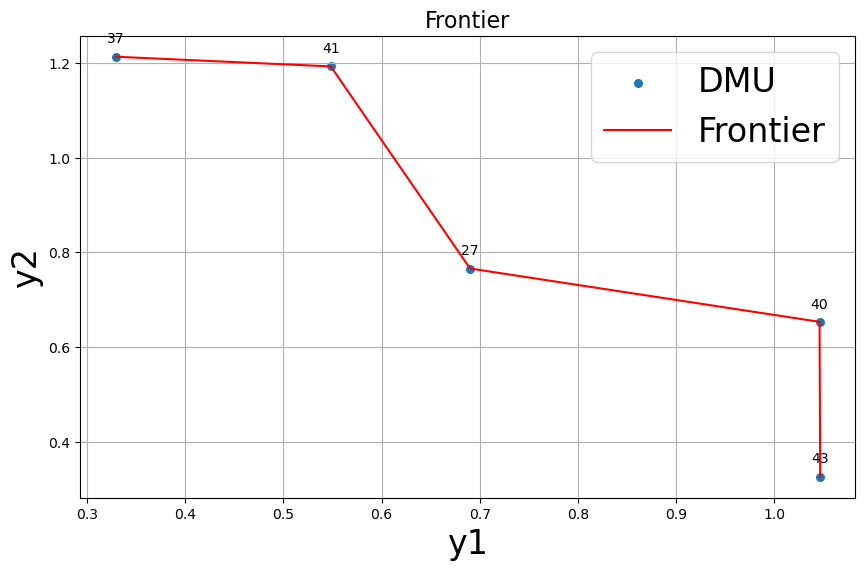

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['y1'], df_sorted['y2'], marker='o', label='DMU', s=30)
plt.plot(df_sorted['y1'], df_sorted['y2'], c='r', label='Frontier')  # Add red line to legend
plt.xlabel('y1', fontsize=24)  # Increase font size for x-axis label
plt.ylabel('y2', fontsize=24)  # Increase font size for y-axis label
plt.title('Frontier', fontsize=16)  # Increase font size for the title

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted['y1'].iloc[i], df_sorted['y2'].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize legend
plt.legend(fontsize=24)  # Increase font size for the legend
plt.grid(True)
plt.savefig('HighDPI/MarginalOutputMix-1.png', dpi=300)
plt.show()

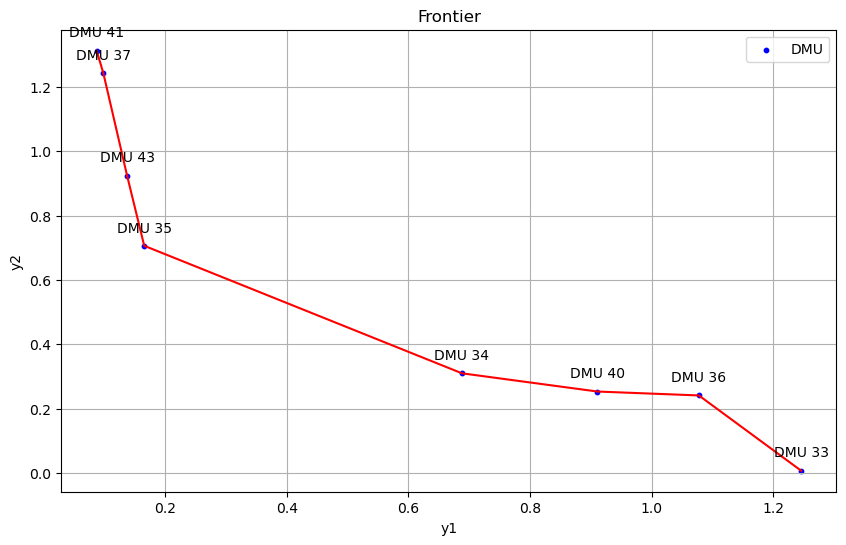

In [50]:
# Step 1: Identify the most left point and set its y2 value to the max y2 value in the dataset
df_sorted.iloc[0, df_sorted.columns.get_loc(axis_2_name)] = df_sorted[axis_2_name].max()

# Step 2: Identify the most right point and set its y1 value to the max y1 value in the dataset
df_sorted.iloc[-1, df_sorted.columns.get_loc(axis_1_name)] = df_sorted[axis_1_name].max()

# Display the modified DataFrame to confirm the changes
df_sorted.head(), df_sorted.tail()
# Plot the modified DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMU', s=10)
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title('Frontier')

# Connect the points with straight lines
plt.plot(df_sorted[axis_1_name], df_sorted[axis_2_name], c='r')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()


In [51]:
# Initialize the variable to store the total Area-Under-Curve (AUC)
total_auc = 0.0

# Calculate the AUC by summing up the areas of trapezoids formed by adjacent points
for i in range(len(df_sorted) - 1):
#     print(f'DMU {i}')
    a = df_sorted[axis_2_name].iloc[i]  # Length of one parallel side
    b = df_sorted[axis_2_name].iloc[i+1]  # Length of the other parallel side
    h = df_sorted[axis_1_name].iloc[i+1] - df_sorted[axis_1_name].iloc[i]  # Height (difference in y1 values)
#     print(a, b, h)
    # Area of the trapezoid
    area = (a + b) * h / 2.0
    
    # Add the area to the total AUC
    total_auc += area
    if i == 0:
        total_auc += a * df_sorted[axis_1_name].iloc[i]

print(total_auc)
# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage = (total_auc / (max_y1 * max_y2)) * 100
# auc_percentage = 100 - auc_percentage
print(auc_percentage)


0.5836130097363101
35.69383695716965


In [52]:
auc_list = []
type_list = []
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0:
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    elif i == len(df_sorted)-1:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    print(curr_x, curr_y)
    print('RHS', rhs_x, rhs_y)
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - lhs_y) * (curr_x - lhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - lhs_y) + (rhs_y - lhs_y)) * (rhs_x - curr_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_pct = 0
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - rhs_y) * (curr_x - rhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - rhs_y) + (lhs_y - rhs_y)) * (curr_x - lhs_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_list.append(auc_pct)

DMU 0
0.08715973709824212 1.31239766299327
RHS 0.09816213218972236 1.242977052850211
Slope:  0.0 -6.309590736003947
外凸
DMU 1
0.09816213218972236 1.242977052850211
RHS 0.13729421951510978 0.9237565103842604
Slope:  -6.309590736003947 -8.157513802205292
外凸
DMU 2
0.13729421951510978 0.9237565103842604
RHS 0.16545022973318424 0.7059087203287143
Slope:  -8.157513802205292 -7.737168312138948
內凹
DMU 3
0.16545022973318424 0.7059087203287143
RHS 0.6879802919645519 0.30940845063257827
Slope:  -7.737168312138948 -0.7588085324755388
內凹
DMU 4
0.6879802919645519 0.30940845063257827
RHS 0.9108544434708565 0.2527381159253264
Slope:  -0.7588085324755388 -0.2542705572819591
內凹
DMU 5
0.9108544434708565 0.2527381159253264
RHS 1.0775816779687855 0.24059953454485006
Slope:  -0.2542705572819591 -0.07280503042607078
內凹
DMU 6
1.0775816779687855 0.24059953454485006
RHS 1.2458515033858326 0.00653998073480444
Slope:  -0.07280503042607078 -1.3909775756285618
外凸
DMU 7
1.2458515033858326 0.00653998073480444
RHS 1.24

In [53]:
df_sorted['scope'] = auc_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[axis_1_name, axis_2_name, 'scope']]

,y1,y2,scope
DMU 41,0.087160,1.312398,0.887916
DMU 37,0.098162,1.242977,0.040834
DMU 43,0.137294,0.923757,0.012816
DMU 35,0.165450,0.705909,0.303471
DMU 34,0.687980,0.309408,0.173945
DMU 40,0.910854,0.252738,0.251533
DMU 36,1.077582,0.240600,0.448393
DMU 33,1.245852,0.006540,0.027182


In [54]:
df_sorted['scope'] = auc_list
df_sorted['type'] = type_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[ 'type','scope']]

,type,scope
DMU 41,Positive,0.887916
DMU 37,Positive,0.040834
DMU 43,Negative,0.012816
DMU 35,Negative,0.303471
DMU 34,Negative,0.173945
DMU 40,Negative,0.251533
DMU 36,Positive,0.448393
DMU 33,Positive,0.027182


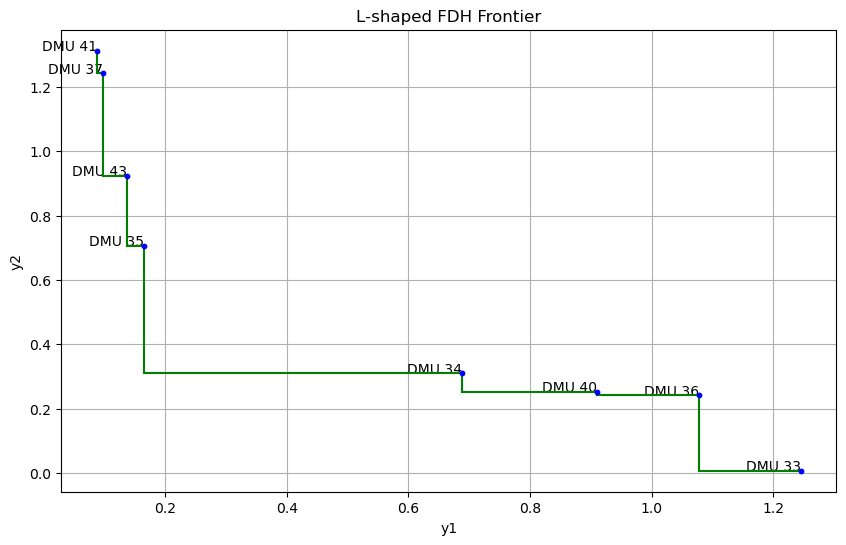

In [55]:
new_df = pd.DataFrame(df_sorted)

# We'll filter the data points that are on the second frontier
frontier_points = new_df[new_df['frontier'] == 0].sort_values(by=axis_1_name)

# Function to plot both L-shaped FDH frontiers on the same plot with different colors

def plot_combined_l_shaped_frontiers(frontier_df):
    plt.figure(figsize=(10, 6))

    # Plot the data points
    plt.scatter(frontier_df[axis_1_name], frontier_df[axis_2_name], color='blue', zorder=5, s=10)
    
    # Annotate the points with their DMU index
    for _, row in frontier_df.iterrows():
        plt.text(row[axis_1_name], row[axis_2_name], row['index'], fontsize=10, ha='right')
    
    # Plot the first L-shaped lines (original direction)
#     for i in range(len(frontier_df) - 1):
#         point1 = frontier_df.iloc[i]
#         point2 = frontier_df.iloc[i + 1]
#         plt.plot([point1[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point1[axis_2_name]], color='red', zorder=3)  # horizontal line
#         plt.plot([point2[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='red', zorder=3)  # vertical line

    # Plot the second L-shaped lines (reversed direction)
    for i in range(len(frontier_df) - 1):
        point1 = frontier_df.iloc[i]
        point2 = frontier_df.iloc[i + 1]
        plt.plot([point1[axis_1_name], point1[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # vertical line
        plt.plot([point1[axis_1_name], point2[axis_1_name]], [point2[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # horizontal line

    plt.title('L-shaped FDH Frontier')
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.grid(True)
    plt.show()

# Plot the combined L-shaped FDH frontiers
plot_combined_l_shaped_frontiers(frontier_points)


In [56]:
auc_1_list = []
auc_2_list = []
type_list = []
total_auc_fdh = 0
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0: # left-most point
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    elif i == len(df_sorted)-1: # right-most point
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0 # rhs point coordinate
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    width = curr_x - lhs_x
    height = curr_y
    total_auc_fdh += width * height
    # Calculate rectangles.
    a = lhs_y - curr_y
    b = curr_y - rhs_y
    c = curr_x - lhs_x
    d = rhs_x - curr_x
    
    total_rec_area = (a + b) * (c + d)
    bottom_left =  b * c
    top_right = a * d
    top_left = a * c
    bottom_right = b * d
    
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        auc_1 = top_right
        auc_2 = total_rec_area - bottom_left
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_1_list.append(auc_1_pct)
    auc_2_list.append(auc_2_pct)

DMU 0
Slope:  0.0 -6.309590736003947
外凸
DMU 1
Slope:  -6.309590736003947 -8.157513802205292
外凸
DMU 2
Slope:  -8.157513802205292 -7.737168312138948
內凹
DMU 3
Slope:  -7.737168312138948 -0.7588085324755388
內凹
DMU 4
Slope:  -0.7588085324755388 -0.2542705572819591
內凹
DMU 5
Slope:  -0.2542705572819591 -0.07280503042607078
內凹
DMU 6
Slope:  -0.07280503042607078 -1.3909775756285618
外凸
DMU 7
Slope:  -1.3909775756285618 -6.53998073480444e+47
外凸


In [57]:
# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage_fdh = (total_auc_fdh / (max_y1 * max_y2)) * 100
auc_percentage_fdh = auc_percentage_fdh
auc_percentage_fdh

27.11270815444774

In [58]:
df_sorted['FDH_scope'] = auc_1_list
df_sorted[['index', 'type', 'scope', 'FDH_scope']]

,index,type,scope,FDH_scope
DMU 41,DMU 41,Positive,0.887916,0.887916
DMU 37,DMU 37,Positive,0.040834,0.180257
DMU 43,DMU 43,Negative,0.012816,0.248711
DMU 35,DMU 35,Negative,0.303471,0.336470
DMU 34,DMU 34,Negative,0.173945,0.261607
DMU 40,DMU 40,Negative,0.251533,0.352450
DMU 36,DMU 36,Positive,0.448393,0.473159
DMU 33,DMU 33,Positive,0.027182,0.027182


In [59]:
print(auc_percentage)
print(auc_percentage_fdh)

35.69383695716965
27.11270815444774


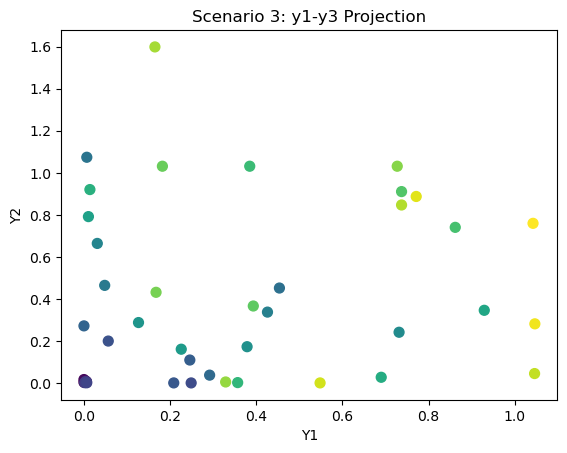

In [29]:
axis_1, axis_2 = projected_y[0], projected_y[2]
axis_1_name, axis_2_name = 'y1', 'y3'
sub_tdf = transformed_df[['y1', 'y3', 'x', 'class']]
# 建立一個新的圖表
plt.figure()
# 計算點的個數
num_points = len(axis_1)

# 生成由淺到深的顏色列表
colors = np.arange(num_points) / (num_points - 1)
# 繪製座標點
plt.scatter(axis_1, axis_2, marker='o', s=50, c=colors)  # s 是點的大小
# 設定顏色條
# plt.colorbar(label='Index')
# 設定圖表標題與軸標籤
# plt.title('座標圖')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.title(f'{sce}: {axis_1_name}-{axis_2_name} Projection')

# 加入圖例
# plt.legend()

# 顯示圖表
plt.show()

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
Frontier 0
6 DMUs


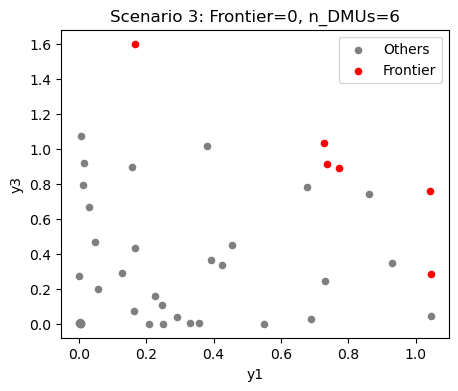

Mean: -28.012499076975285
Mean after removing extremes: -5.404367908209347
Median: -5.404367908209347
Positive Return to Scope


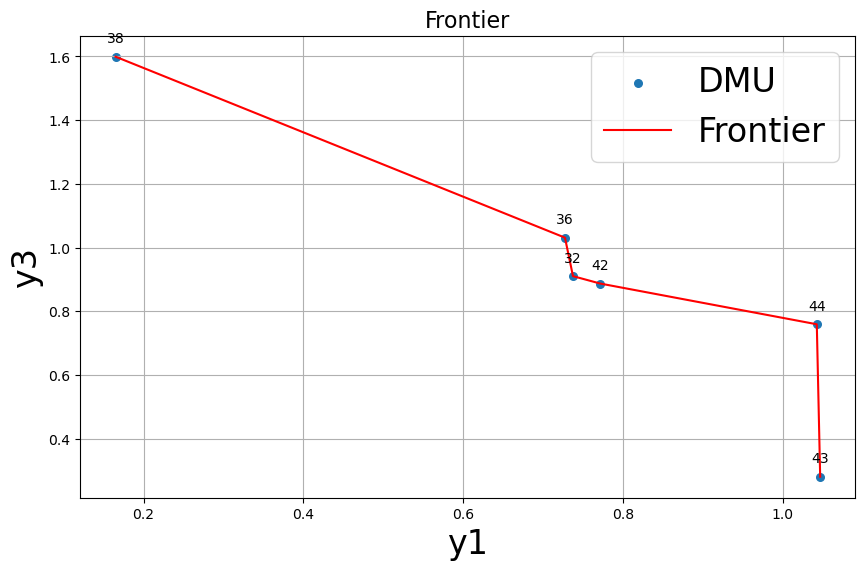

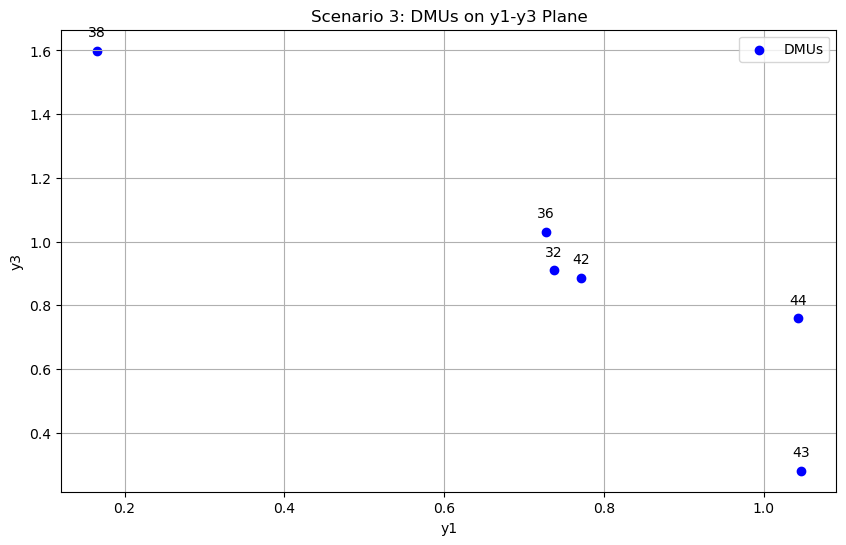

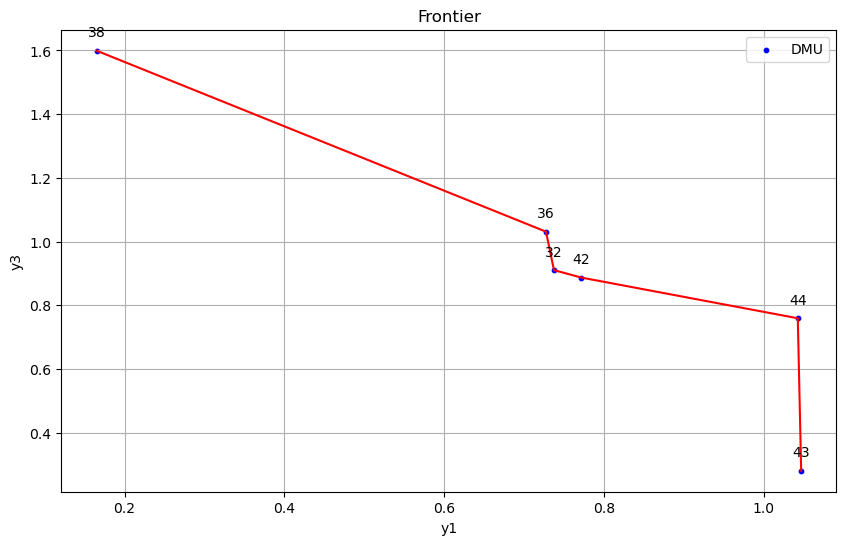

1.2691925927877585
75.82495698436483
DMU 0
0.1649107657407656 1.5990625608019564
RHS 0.7273361017353837 1.0312955254720046
Slope:  0.0 -1.0094976150494486
外凸
DMU 1
0.7273361017353837 1.0312955254720046
RHS 0.7373720106426872 0.9105706028355212
Slope:  -1.0094976150494486 -12.029296374803376
外凸
DMU 2
0.7373720106426872 0.9105706028355212
RHS 0.7713724093470269 0.8873654501201637
Slope:  -12.029296374803376 -0.6824964882660532
內凹
DMU 3
0.7713724093470269 0.8873654501201637
RHS 1.0425358540006393 0.7595299061514585
Slope:  -0.6824964882660532 -0.47143354493082146
內凹
DMU 4
1.0425358540006393 0.7595299061514585
RHS 1.0467667066194166 0.2811918502099052
Slope:  -0.47143354493082146 -113.05949392295058
外凸
DMU 5
1.0467667066194166 0.2811918502099052
RHS 1.0467667066194166 0
Slope:  -113.05949392295058 -2.811918502099052e+49
外凸


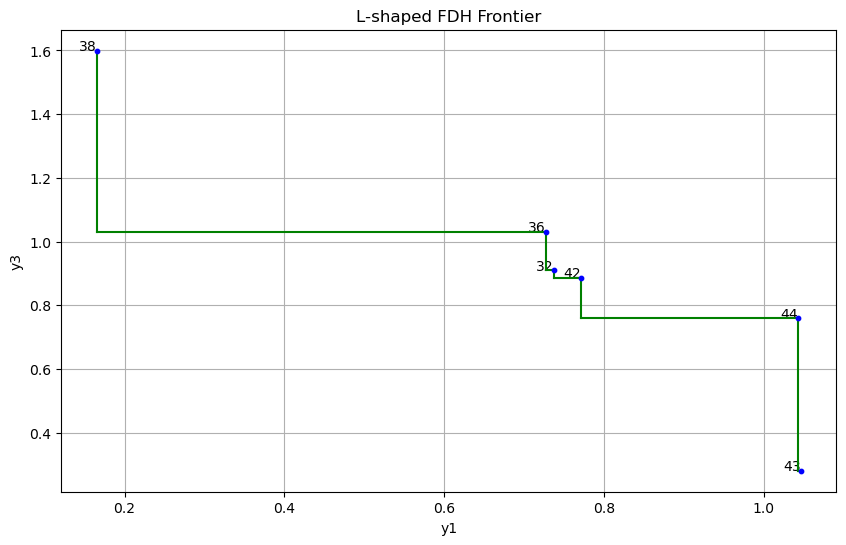

DMU 0
Slope:  0.0 -1.0094976150494486
外凸
DMU 1
Slope:  -1.0094976150494486 -12.029296374803376
外凸
DMU 2
Slope:  -12.029296374803376 -0.6824964882660532
內凹
DMU 3
Slope:  -0.6824964882660532 -0.47143354493082146
內凹
DMU 4
Slope:  -0.47143354493082146 -113.05949392295058
外凸
DMU 5
Slope:  -113.05949392295058 -2.811918502099052e+49
外凸


65.13056346807079

In [30]:
data = {
    'y1': sub_tdf[axis_1_name],
    'y3': sub_tdf[axis_2_name],
    'class': sub_tdf['class']
}

df = pd.DataFrame(data)

# Group by class, sort by y1, and calculate index
def calc_index(group):
    group = group.sort_values(by=axis_1_name)
    group['index_value'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(0)
    return group
df_test = df[[axis_1_name, axis_2_name]]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index
df_test

fix_index = df_test.index
while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[[axis_1_name]].T)+10, 
                y=np.array(tmp_df[[axis_2_name]].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    break

for i in range(len(df_test['frontier'].unique())):
    print('Frontier', i)
    tmp_0 = df_test[df_test['frontier']==i]
    tmp_1 = df_test[df_test['frontier']!=i]
    print(f'{tmp_0.shape[0]} DMUs')

    # Create the scatter plot
    plt.figure(figsize=(5, 4))
    plt.scatter(tmp_1[axis_1_name], tmp_1[axis_2_name], c='gray', label=f'Others', s=20)
    plt.scatter(tmp_0[axis_1_name], tmp_0[axis_2_name], c='red', label=f'Frontier', s=20)
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.title(f'{sce}: Frontier={i}, n_DMUs={tmp_0.shape[0]}')
    plt.legend()
    plt.show()
    break

# Group by class, sort by y1, and calculate index
def cal_MRTS(group):
    group = group.sort_values(by=axis_1_name)
    group['MRTS'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(np.nan)
    return group

MRTS = df_test.groupby('frontier').apply(cal_MRTS)

result = MRTS[[axis_1_name, axis_2_name, 'MRTS']]
result.columns=[axis_1_name, axis_2_name, 'MRTS']
result.reset_index(inplace=True)

diff_list = result[result['frontier']==0]['MRTS'].diff()
import statistics
diff_ary = np.array(diff_list)
diff_ary = diff_ary[~np.isnan(diff_ary)]
# Calculate the mean of the list
mean = statistics.mean(diff_ary)

# Calculate the mean after removing the maximum and minimum values
mean_without_extremes = statistics.mean(sorted(diff_ary)[1:-1])

# Calculate the median of the list
median = statistics.median(diff_ary)

# Print the results
print("Mean:", mean)
print("Mean after removing extremes:", mean_without_extremes)
print("Median:", median)
if mean_without_extremes > 0:
    print('Negative Return to Scope')
elif mean_without_extremes == 0:
    print('Constant Return to Scope')
else:
    print('Positive Return to Scope')

df_est = df_test[df_test['frontier']==0]
df_est
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'y1' column
df_sorted = df_est.sort_values(by=axis_1_name)

# Plot the DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['y1'], df_sorted['y3'], marker='o', label='DMU', s=30)
plt.plot(df_sorted['y1'], df_sorted['y3'], c='r', label='Frontier')  # Add red line to legend
plt.xlabel('y1', fontsize=24)  # Increase font size for x-axis label
plt.ylabel('y3', fontsize=24)  # Increase font size for y-axis label
plt.title('Frontier', fontsize=16)  # Increase font size for the title

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted['y1'].iloc[i], df_sorted['y3'].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize legend
plt.legend(fontsize=24)  # Increase font size for the legend
plt.grid(True)
plt.savefig('HighDPI/MarginalOutputMix-2.png', dpi=300)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMUs')
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title(f'{sce}: DMUs on {axis_1_name}-{axis_2_name} Plane')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()

# Step 1: Identify the most left point and set its y2 value to the max y2 value in the dataset
df_sorted.iloc[0, df_sorted.columns.get_loc(axis_2_name)] = df_sorted[axis_2_name].max()

# Step 2: Identify the most right point and set its y1 value to the max y1 value in the dataset
df_sorted.iloc[-1, df_sorted.columns.get_loc(axis_1_name)] = df_sorted[axis_1_name].max()

# Display the modified DataFrame to confirm the changes
df_sorted.head(), df_sorted.tail()
# Plot the modified DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMU', s=10)
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title('Frontier')

# Connect the points with straight lines
plt.plot(df_sorted[axis_1_name], df_sorted[axis_2_name], c='r')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()


# Initialize the variable to store the total Area-Under-Curve (AUC)
total_auc = 0.0

# Calculate the AUC by summing up the areas of trapezoids formed by adjacent points
for i in range(len(df_sorted) - 1):
#     print(f'DMU {i}')
    a = df_sorted[axis_2_name].iloc[i]  # Length of one parallel side
    b = df_sorted[axis_2_name].iloc[i+1]  # Length of the other parallel side
    h = df_sorted[axis_1_name].iloc[i+1] - df_sorted[axis_1_name].iloc[i]  # Height (difference in y1 values)
#     print(a, b, h)
    # Area of the trapezoid
    area = (a + b) * h / 2.0
    
    # Add the area to the total AUC
    total_auc += area
    if i == 0:
        total_auc += a * df_sorted[axis_1_name].iloc[i]

print(total_auc)
# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage = (total_auc / (max_y1 * max_y2)) * 100
# auc_percentage = 100 - auc_percentage
print(auc_percentage)


auc_list = []
type_list = []
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0:
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    elif i == len(df_sorted)-1:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    print(curr_x, curr_y)
    print('RHS', rhs_x, rhs_y)
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - lhs_y) * (curr_x - lhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - lhs_y) + (rhs_y - lhs_y)) * (rhs_x - curr_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_pct = 0
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - rhs_y) * (curr_x - rhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - rhs_y) + (lhs_y - rhs_y)) * (curr_x - lhs_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_list.append(auc_pct)

df_sorted['scope'] = auc_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[axis_1_name, axis_2_name, 'scope']]


df_sorted['scope'] = auc_list
df_sorted['type'] = type_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[ 'type','scope']]

new_df = pd.DataFrame(df_sorted)

# We'll filter the data points that are on the second frontier
frontier_points = new_df[new_df['frontier'] == 0].sort_values(by=axis_1_name)

# Function to plot both L-shaped FDH frontiers on the same plot with different colors

def plot_combined_l_shaped_frontiers(frontier_df):
    plt.figure(figsize=(10, 6))

    # Plot the data points
    plt.scatter(frontier_df[axis_1_name], frontier_df[axis_2_name], color='blue', zorder=5, s=10)
    
    # Annotate the points with their DMU index
    for _, row in frontier_df.iterrows():
        plt.text(row[axis_1_name], row[axis_2_name], row['index'], fontsize=10, ha='right')
    
    # Plot the first L-shaped lines (original direction)
#     for i in range(len(frontier_df) - 1):
#         point1 = frontier_df.iloc[i]
#         point2 = frontier_df.iloc[i + 1]
#         plt.plot([point1[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point1[axis_2_name]], color='red', zorder=3)  # horizontal line
#         plt.plot([point2[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='red', zorder=3)  # vertical line

    # Plot the second L-shaped lines (reversed direction)
    for i in range(len(frontier_df) - 1):
        point1 = frontier_df.iloc[i]
        point2 = frontier_df.iloc[i + 1]
        plt.plot([point1[axis_1_name], point1[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # vertical line
        plt.plot([point1[axis_1_name], point2[axis_1_name]], [point2[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # horizontal line

    plt.title('L-shaped FDH Frontier')
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.grid(True)
    plt.show()

# Plot the combined L-shaped FDH frontiers
plot_combined_l_shaped_frontiers(frontier_points)


auc_1_list = []
auc_2_list = []
type_list = []
total_auc_fdh = 0
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0: # left-most point
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    elif i == len(df_sorted)-1: # right-most point
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0 # rhs point coordinate
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    width = curr_x - lhs_x
    height = curr_y
    total_auc_fdh += width * height
    # Calculate rectangles.
    a = lhs_y - curr_y
    b = curr_y - rhs_y
    c = curr_x - lhs_x
    d = rhs_x - curr_x
    
    total_rec_area = (a + b) * (c + d)
    bottom_left =  b * c
    top_right = a * d
    top_left = a * c
    bottom_right = b * d
    
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        auc_1 = top_right
        auc_2 = total_rec_area - bottom_left
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_1_list.append(auc_1_pct)
    auc_2_list.append(auc_2_pct)

# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage_fdh = (total_auc_fdh / (max_y1 * max_y2)) * 100
auc_percentage_fdh = auc_percentage_fdh
auc_percentage_fdh

In [62]:
df_sorted['FDH_scope'] = auc_1_list
df_sorted[['index', 'type', 'scope', 'FDH_scope']]

,index,type,scope,FDH_scope
DMU 41,DMU 41,Positive,0.887916,0.887916
DMU 37,DMU 37,Positive,0.040834,0.180257
DMU 43,DMU 43,Negative,0.012816,0.248711
DMU 35,DMU 35,Negative,0.303471,0.336470
DMU 34,DMU 34,Negative,0.173945,0.261607
DMU 40,DMU 40,Negative,0.251533,0.352450
DMU 36,DMU 36,Positive,0.448393,0.473159
DMU 33,DMU 33,Positive,0.027182,0.027182


In [63]:
print(auc_percentage)
print(auc_percentage_fdh)

35.69383695716965
27.11270815444774


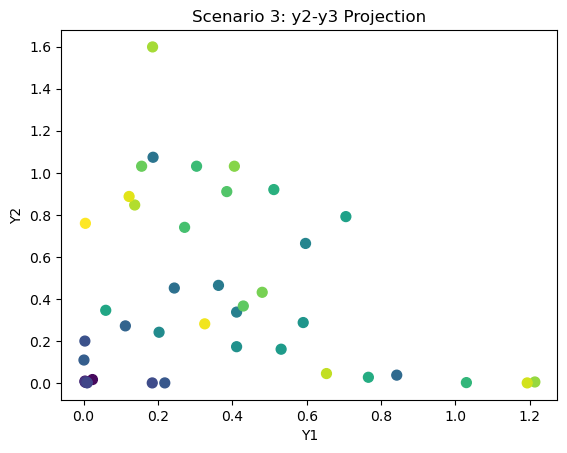

In [31]:
axis_1, axis_2 = projected_y[1], projected_y[2]
axis_1_name, axis_2_name = 'y2', 'y3'
sub_tdf = transformed_df[['y2', 'y3', 'x', 'class']]
# 建立一個新的圖表
plt.figure()
# 計算點的個數
num_points = len(axis_1)

# 生成由淺到深的顏色列表
colors = np.arange(num_points) / (num_points - 1)
# 繪製座標點
plt.scatter(axis_1, axis_2, marker='o', s=50, c=colors)  # s 是點的大小
# 設定顏色條
# plt.colorbar(label='Index')
# 設定圖表標題與軸標籤
# plt.title('座標圖')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.title(f'{sce}: {axis_1_name}-{axis_2_name} Projection')

# 加入圖例
# plt.legend()

# 顯示圖表
plt.show()

RangeIndex(start=0, stop=45, step=1)
RangeIndex(start=0, stop=45, step=1)
Frontier 0
7 DMUs


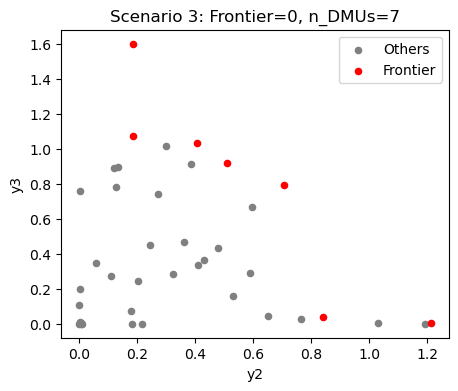

Mean: 80.48637108363552
Mean after removing extremes: 1.6523759860557719
Median: 0.38242772391352053
Negative Return to Scope


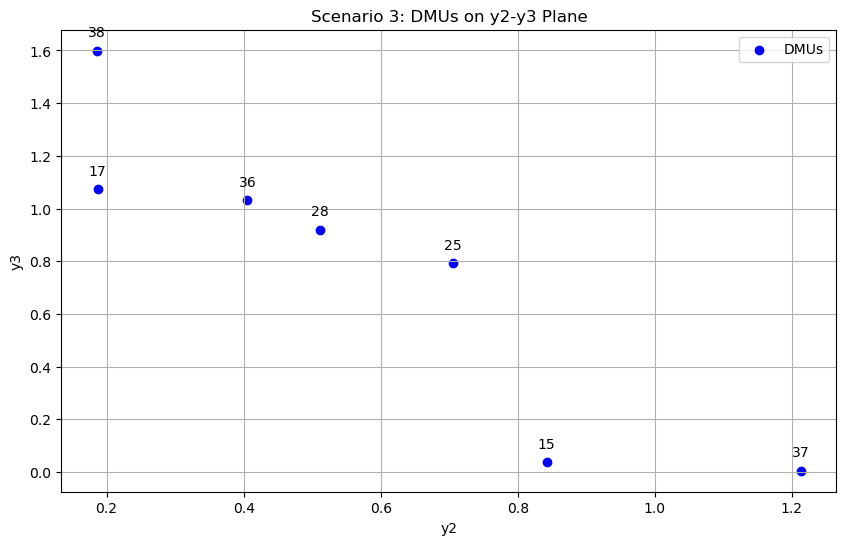

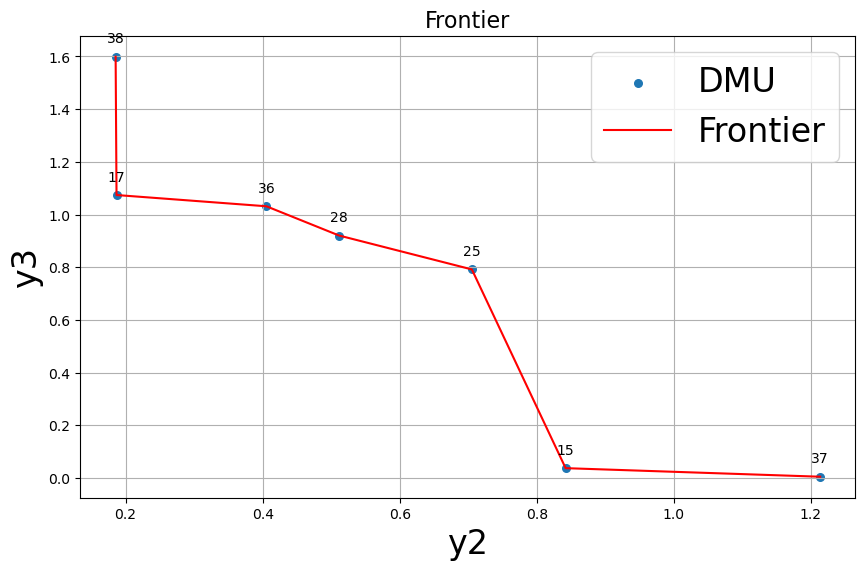

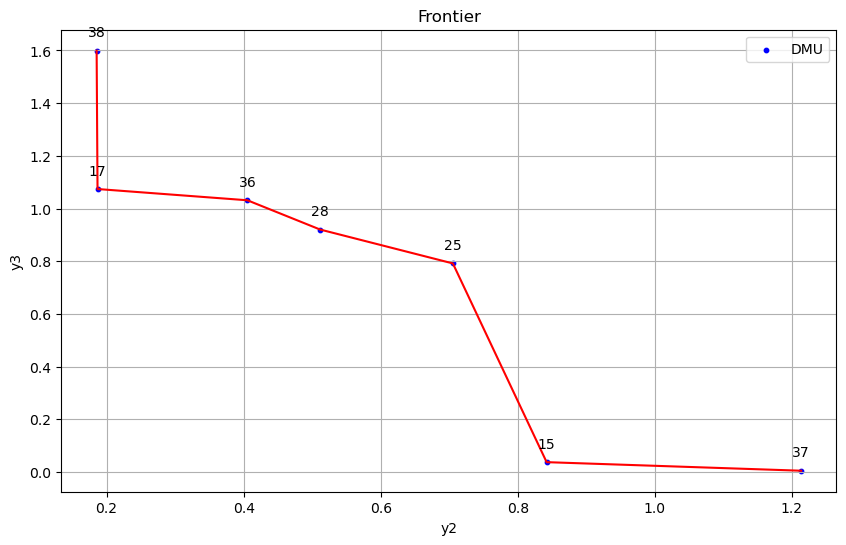

0.8621962660626149
44.42684511393514
DMU 0
0.1853590634637374 1.5990625608019564
RHS 0.1866635476343669 1.0739824074332502
Slope:  0.0 -402.51937523727725
外凸
DMU 1
0.1866635476343669 1.0739824074332502
RHS 0.4053680561793473 1.0312955254720046
Slope:  -402.51937523727725 -0.19518062176786946
內凹
DMU 2
0.4053680561793473 1.0312955254720046
RHS 0.5115081520943776 0.920210565166202
Slope:  -0.19518062176786946 -1.0465880904680063
外凸
DMU 3
0.5115081520943776 0.920210565166202
RHS 0.7053026907422776 0.7914999133415553
Slope:  -1.0465880904680063 -0.6641603665544857
內凹
DMU 4
0.7053026907422776 0.7914999133415553
RHS 0.8421378265303596 0.0370419426764453
Slope:  -0.6641603665544857 -5.5136275220535955
外凸
DMU 5
0.8421378265303596 0.0370419426764453
RHS 1.213654886416388 0.0045268368027812
Slope:  -5.5136275220535955 -0.0875198190996636
內凹
DMU 6
1.213654886416388 0.0045268368027812
RHS 1.213654886416388 0
Slope:  -0.0875198190996636 -4.5268368027812e+47
外凸


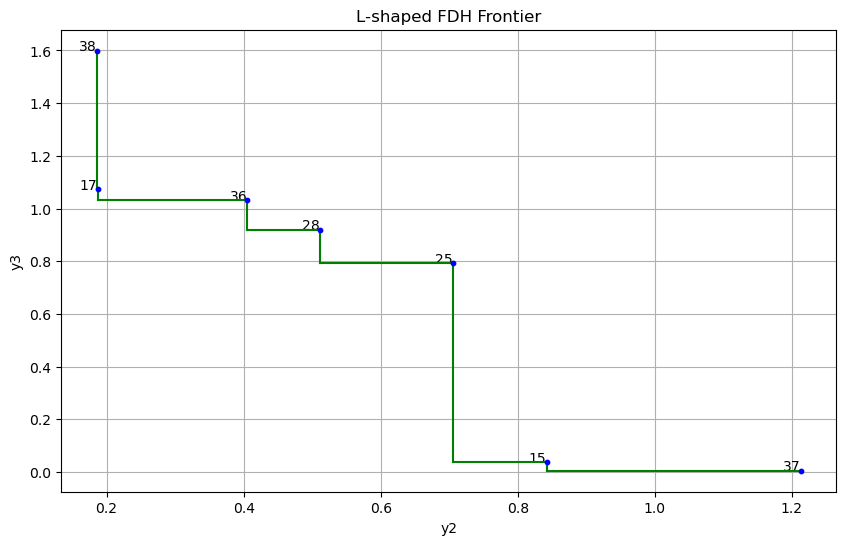

DMU 0
Slope:  0.0 -402.51937523727725
外凸
DMU 1
Slope:  -402.51937523727725 -0.19518062176786946
內凹
DMU 2
Slope:  -0.19518062176786946 -1.0465880904680063
外凸
DMU 3
Slope:  -1.0465880904680063 -0.6641603665544857
內凹
DMU 4
Slope:  -0.6641603665544857 -5.5136275220535955
外凸
DMU 5
Slope:  -5.5136275220535955 -0.0875198190996636
內凹
DMU 6
Slope:  -0.0875198190996636 -4.5268368027812e+47
外凸


40.25128488463465

In [32]:
data = {
    axis_1_name: sub_tdf[axis_1_name],
    axis_2_name: sub_tdf[axis_2_name],
    'class': sub_tdf['class']
}

df = pd.DataFrame(data)

# Group by class, sort by y1, and calculate index
def calc_index(group):
    group = group.sort_values(by=axis_1_name)
    group['index_value'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(0)
    return group
df_test = df[[axis_1_name, axis_2_name]]
n_evalDMU = df_test.shape[0]
front = 0
df_test['frontier'] = -1
df_test['index'] = df_test.index
df_test

fix_index = df_test.index
while n_evalDMU > 0:
    # Initialize 
    tmp_df = df_test[df_test['frontier']==-1]
    # Identify Frontier
    eff_dict_tmp, lambdas_dict_tmp, projected_x_tmp, projected_y_tmp =\
    solver.dea_dual(dmu=tmp_df.index, 
                x=-np.array(tmp_df[[axis_1_name]].T)+10, 
                y=np.array(tmp_df[[axis_2_name]].T), 
                orient=const.OUTPUT_ORIENT,
                lambda_k_type='BINARY')
    
    # Analyze efficiency
    eff_df = pd.DataFrame(list(eff_dict_tmp.items()), columns=['index', 'eff'])
    
#     eff_df.set_index('Index', inplace=True)
    print(df_test.index)
    df_test = df_test.merge(eff_df, on='index', how='left')
    df_test.index=fix_index
    print(df_test.index)
    df_test.loc[(df_test['eff'] ==1) ==True, 'frontier'] = front
#     print(df_test)
    df_test.drop(columns=['eff'], inplace=True)
    n_evalDMU = df_test[df_test['frontier']==-1].shape[0]
    front += 1
    break

for i in range(len(df_test['frontier'].unique())):
    print('Frontier', i)
    tmp_0 = df_test[df_test['frontier']==i]
    tmp_1 = df_test[df_test['frontier']!=i]
    print(f'{tmp_0.shape[0]} DMUs')

    # Create the scatter plot
    plt.figure(figsize=(5, 4))
    plt.scatter(tmp_1[axis_1_name], tmp_1[axis_2_name], c='gray', label=f'Others', s=20)
    plt.scatter(tmp_0[axis_1_name], tmp_0[axis_2_name], c='red', label=f'Frontier', s=20)
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.title(f'{sce}: Frontier={i}, n_DMUs={tmp_0.shape[0]}')
    plt.legend()
    plt.show()
    break

# Group by class, sort by y1, and calculate index
def cal_MRTS(group):
    group = group.sort_values(by=axis_1_name)
    group['MRTS'] = (group[axis_2_name].diff() / group[axis_1_name].diff()).fillna(np.nan)
    return group

MRTS = df_test.groupby('frontier').apply(cal_MRTS)

result = MRTS[[axis_1_name, axis_2_name, 'MRTS']]
result.columns=[axis_1_name, axis_2_name, 'MRTS']
result.reset_index(inplace=True)

diff_list = result[result['frontier']==0]['MRTS'].diff()
import statistics
diff_ary = np.array(diff_list)
diff_ary = diff_ary[~np.isnan(diff_ary)]
# Calculate the mean of the list
mean = statistics.mean(diff_ary)

# Calculate the mean after removing the maximum and minimum values
mean_without_extremes = statistics.mean(sorted(diff_ary)[1:-1])

# Calculate the median of the list
median = statistics.median(diff_ary)

# Print the results
print("Mean:", mean)
print("Mean after removing extremes:", mean_without_extremes)
print("Median:", median)
if mean_without_extremes > 0:
    print('Negative Return to Scope')
elif mean_without_extremes == 0:
    print('Constant Return to Scope')
else:
    print('Positive Return to Scope')

df_est = df_test[df_test['frontier']==0]
df_est
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'y1' column
df_sorted = df_est.sort_values(by=axis_1_name)

# Plot the DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMUs')
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title(f'{sce}: DMUs on {axis_1_name}-{axis_2_name} Plane')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()

# Step 1: Identify the most left point and set its y2 value to the max y2 value in the dataset
df_sorted.iloc[0, df_sorted.columns.get_loc(axis_2_name)] = df_sorted[axis_2_name].max()

# Step 2: Identify the most right point and set its y1 value to the max y1 value in the dataset
df_sorted.iloc[-1, df_sorted.columns.get_loc(axis_1_name)] = df_sorted[axis_1_name].max()

# Display the modified DataFrame to confirm the changes
df_sorted.head(), df_sorted.tail()
# Plot the modified DMUs on a 2D plane
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['y2'], df_sorted['y3'], marker='o', label='DMU', s=30)
plt.plot(df_sorted['y2'], df_sorted['y3'], c='r', label='Frontier')  # Add red line to legend
plt.xlabel('y2', fontsize=24)  # Increase font size for x-axis label
plt.ylabel('y3', fontsize=24)  # Increase font size for y-axis label
plt.title('Frontier', fontsize=16)  # Increase font size for the title

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted['y2'].iloc[i], df_sorted['y3'].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize legend
plt.legend(fontsize=24)  # Increase font size for the legend
plt.grid(True)
plt.savefig('HighDPI/MarginalOutputMix-3.png', dpi=300)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted[axis_1_name], df_sorted[axis_2_name], marker='o', c='b', label='DMU', s=10)
plt.xlabel(axis_1_name)
plt.ylabel(axis_2_name)
plt.title('Frontier')

# Connect the points with straight lines
plt.plot(df_sorted[axis_1_name], df_sorted[axis_2_name], c='r')

# Annotate the points with the DMU names from the 'level_1' column
for i, txt in enumerate(df_sorted['index']):
    plt.annotate(txt, (df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.show()


# Initialize the variable to store the total Area-Under-Curve (AUC)
total_auc = 0.0

# Calculate the AUC by summing up the areas of trapezoids formed by adjacent points
for i in range(len(df_sorted) - 1):
#     print(f'DMU {i}')
    a = df_sorted[axis_2_name].iloc[i]  # Length of one parallel side
    b = df_sorted[axis_2_name].iloc[i+1]  # Length of the other parallel side
    h = df_sorted[axis_1_name].iloc[i+1] - df_sorted[axis_1_name].iloc[i]  # Height (difference in y1 values)
#     print(a, b, h)
    # Area of the trapezoid
    area = (a + b) * h / 2.0
    
    # Add the area to the total AUC
    total_auc += area
    if i == 0:
        total_auc += a * df_sorted[axis_1_name].iloc[i]

print(total_auc)
# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage = (total_auc / (max_y1 * max_y2)) * 100
# auc_percentage = 100 - auc_percentage
print(auc_percentage)


auc_list = []
type_list = []
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0:
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    elif i == len(df_sorted)-1:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1]
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1]
    print(curr_x, curr_y)
    print('RHS', rhs_x, rhs_y)
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - lhs_y) * (curr_x - lhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - lhs_y) + (rhs_y - lhs_y)) * (rhs_x - curr_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_pct = 0
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        base_tri_area = np.abs((rhs_x - lhs_x) * (rhs_y - lhs_y) * 0.5)
        small_tri_area = np.abs((curr_y - rhs_y) * (curr_x - rhs_x) * 0.5)
        small_trap_area = np.abs(((curr_y - rhs_y) + (lhs_y - rhs_y)) * (curr_x - lhs_x) * 0.5)
        auc = base_tri_area - (small_tri_area + small_trap_area)
        auc_pct = auc / base_tri_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_list.append(auc_pct)

df_sorted['scope'] = auc_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[axis_1_name, axis_2_name, 'scope']]


df_sorted['scope'] = auc_list
df_sorted['type'] = type_list
df_sorted['overall_scope'] = auc_percentage/100
df_sorted[[ 'type','scope']]

new_df = pd.DataFrame(df_sorted)

# We'll filter the data points that are on the second frontier
frontier_points = new_df[new_df['frontier'] == 0].sort_values(by=axis_1_name)

# Function to plot both L-shaped FDH frontiers on the same plot with different colors

def plot_combined_l_shaped_frontiers(frontier_df):
    plt.figure(figsize=(10, 6))

    # Plot the data points
    plt.scatter(frontier_df[axis_1_name], frontier_df[axis_2_name], color='blue', zorder=5, s=10)
    
    # Annotate the points with their DMU index
    for _, row in frontier_df.iterrows():
        plt.text(row[axis_1_name], row[axis_2_name], row['index'], fontsize=10, ha='right')
    
    # Plot the first L-shaped lines (original direction)
#     for i in range(len(frontier_df) - 1):
#         point1 = frontier_df.iloc[i]
#         point2 = frontier_df.iloc[i + 1]
#         plt.plot([point1[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point1[axis_2_name]], color='red', zorder=3)  # horizontal line
#         plt.plot([point2[axis_1_name], point2[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='red', zorder=3)  # vertical line

    # Plot the second L-shaped lines (reversed direction)
    for i in range(len(frontier_df) - 1):
        point1 = frontier_df.iloc[i]
        point2 = frontier_df.iloc[i + 1]
        plt.plot([point1[axis_1_name], point1[axis_1_name]], [point1[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # vertical line
        plt.plot([point1[axis_1_name], point2[axis_1_name]], [point2[axis_2_name], point2[axis_2_name]], color='green', zorder=4)  # horizontal line

    plt.title('L-shaped FDH Frontier')
    plt.xlabel(axis_1_name)
    plt.ylabel(axis_2_name)
    plt.grid(True)
    plt.show()

# Plot the combined L-shaped FDH frontiers
plot_combined_l_shaped_frontiers(frontier_points)


auc_1_list = []
auc_2_list = []
type_list = []
total_auc_fdh = 0
for i in range(len(df_sorted)):
    # Locate 3 points.
    curr_x, curr_y = df_sorted[axis_1_name].iloc[i], df_sorted[axis_2_name].iloc[i]
    print(f'DMU {i}')
    if i == 0: # left-most point
        lhs_x, lhs_y = 0, df_sorted[axis_2_name].iloc[i] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    elif i == len(df_sorted)-1: # right-most point
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i], 0 # rhs point coordinate
    else:
        lhs_x, lhs_y = df_sorted[axis_1_name].iloc[i-1], df_sorted[axis_2_name].iloc[i-1] # lhs point coordinate
        rhs_x, rhs_y = df_sorted[axis_1_name].iloc[i+1], df_sorted[axis_2_name].iloc[i+1] # rhs point coordinate
    width = curr_x - lhs_x
    height = curr_y
    total_auc_fdh += width * height
    # Calculate rectangles.
    a = lhs_y - curr_y
    b = curr_y - rhs_y
    c = curr_x - lhs_x
    d = rhs_x - curr_x
    
    total_rec_area = (a + b) * (c + d)
    bottom_left =  b * c
    top_right = a * d
    top_left = a * c
    bottom_right = b * d
    
    # Identify concave or convex
    slope_lhs = (curr_y - lhs_y) / ((curr_x - lhs_x)+0.00000000000000000001)
    slope_rhs = (rhs_y - curr_y) / ((rhs_x - curr_x)+0.00000000000000000000000000000000000000000000000001)
    print('Slope: ', slope_lhs, slope_rhs)
    if slope_lhs > slope_rhs: #外凸
        print('外凸')
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Positive')
    elif slope_lhs == slope_rhs:
        auc_1 = bottom_left
        auc_2 = total_rec_area - top_right
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Constant')
    elif slope_lhs < slope_rhs: #內凹
        print('內凹')
        auc_1 = top_right
        auc_2 = total_rec_area - bottom_left
        auc_1_pct = auc_1 / total_rec_area
        auc_2_pct = auc_2 / total_rec_area
        type_list.append('Negative')
#     print(base_tri_area, auc, auc_pct)
    auc_1_list.append(auc_1_pct)
    auc_2_list.append(auc_2_pct)

# Calculate the maximum y1 and y2 values from the sorted DataFrame
max_y1 = df_sorted[axis_1_name].max()
max_y2 = df_sorted[axis_2_name].max()

# Calculate the AUC as a percentage
auc_percentage_fdh = (total_auc_fdh / (max_y1 * max_y2)) * 100
auc_percentage_fdh = auc_percentage_fdh
auc_percentage_fdh

In [50]:
df_sorted['FDH_scope'] = auc_1_list
df_sorted[['index', 'type', 'scope', 'FDH_scope']]

,index,type,scope,FDH_scope
DMU 41,DMU 41,Positive,0.865059,0.865059
DMU 24,DMU 24,Negative,0.537423,0.573845
DMU 37,DMU 37,Positive,0.047536,0.238470
DMU 29,DMU 29,Positive,0.047502,0.269147
DMU 33,DMU 33,Negative,0.204137,0.229711
DMU 40,DMU 40,Positive,0.549647,0.554465
DMU 23,DMU 23,Negative,0.639040,0.671482
DMU 28,DMU 28,Negative,0.044148,0.264645
DMU 36,DMU 36,Positive,0.408786,0.494581
DMU 42,DMU 42,Positive,0.378047,0.378047


In [51]:
print(auc_percentage)
print(auc_percentage_fdh)

58.69826262956156
55.65093565984317


In [52]:
df_sorted

,y2,y3,frontier,index,scope,overall_scope,type,FDH_scope
DMU 41,0.331976,1.209933,0,DMU 41,0.865059,0.586983,Positive,0.865059
DMU 24,0.383761,0.859211,0,DMU 24,0.537423,0.586983,Negative,0.573845
DMU 37,0.475049,0.819970,0,DMU 37,0.047536,0.586983,Positive,0.238470
DMU 29,0.656757,0.722414,0,DMU 29,0.047502,0.586983,Positive,0.269147
DMU 33,0.780111,0.641994,0,DMU 33,0.204137,0.586983,Negative,0.229711
DMU 40,0.818572,0.639203,0,DMU 40,0.549647,0.586983,Positive,0.554465
DMU 23,0.848717,0.387402,0,DMU 23,0.639040,0.586983,Negative,0.671482
DMU 28,0.996897,0.327600,0,DMU 28,0.044148,0.586983,Negative,0.264645
DMU 36,1.229691,0.249322,0,DMU 36,0.408786,0.586983,Positive,0.494581
DMU 42,1.309689,0.094256,0,DMU 42,0.378047,0.586983,Positive,0.378047


In [81]:
import statsmodels.formula.api as sm

df_test

,y1,y3,frontier,index
DMU 0,0.002483,0.007735,11,DMU 0
DMU 1,0.008269,0.002942,10,DMU 1
DMU 2,0.007387,0.004539,10,DMU 2
DMU 3,0.000880,0.009060,11,DMU 3
DMU 4,0.007367,0.003530,11,DMU 4
DMU 5,0.002324,0.001429,12,DMU 5
DMU 6,0.009170,0.001171,10,DMU 6
DMU 7,0.003076,0.009373,10,DMU 7
DMU 8,0.007300,0.004613,10,DMU 8
DMU 9,0.001302,0.001206,13,DMU 9
